In [1]:
%cd ../

/mnt2/kireev/pycharm-deploy/pytorch-lifestream/experiments/scenario_alpha_battle


In [2]:
!ls ./data/

alfabattle2_alpha_sample.csv		    test_ids.csv
alfabattle2_test_target_contest.csv	    test_transactions_contest.parquet
alfabattle2_test_transactions_contest.zip   train_transactions_contest.parquet
alfabattle2_train_target.csv		    train_trx.parquet
alfabattle2_train_transactions_contest.zip


`train_transactions_contest` - тренировочная выборка с транзакционными данными,
`test_transactions_contest`  - тестовая выборка с транзакционными данными: 
- `app_id` - Идентификатор заявки. заявки пронумерованы так, что более поздним заявкам соответствует более поздняя дата
- `amnt` - Нормированная сумма транзакции. 0.0 - соответствует пропускам 
- `currency` - Идентификатор валюты транзакции
- `operation_kind` - Идентификатор типа транзакции
- `card_type` - Уникальный идентификатор типа карты
- `operation_type` - Идентификатор типа операции по пластиковой карте
- `operation_type_group` - Идентификатор группы карточных операций, например, дебетовая карта или кредитная карта
- `ecommerce_flag` - Признак электронной коммерции
- `payment_system` - Идентификатор типа платежной системы
- `income_flag` - Признак списания/внесения денежных средств на карту
- `mcc` - Уникальный идентификатор типа торговой точки
- `country` - Идентификатор страны транзакции
- `city` - Идентификатор города транзакции
- `mcc_category` - Идентификатор категории магазина транзакции
- `day_of_week` - День недели, когда транзакция была совершена
- `hour` - Час, когда транзакция была совершена
- `days_before` - Количество дней до даты выдачи кредита
- `weekofyear` - Номер недели в году, когда транзакция была совершена
- `hour_diff` - Количество часов с момента прошлой транзакции для данного клиента
- `transaction_number` - Порядковый номер транзакции клиента

`test_target_contest.csv`  выборка для построения прогноза,
`train_target.csv`  выборка для обучения:
- `app_id` - Идентификатор заявки. заявки пронумерованы так, что более поздним заявкам соответствует более поздняя дата
- `product` - Продукт по которому нужно принять решение, уйдет ли заявитель в дефолт или нет
- `flag` - Целевая переменная, 1 - факт ухода в дефолт. Доступна участникам в обучающей выборке.


In [2]:
import numpy as np
import pandas as pd

In [3]:
from IPython.display import display

In [4]:
import matplotlib.pyplot as plt

In [5]:
pd.options.display.max_columns = 50

In [7]:
df_train_target = pd.read_csv('./data/train_target.csv')
df_train_target.head()

,app_id,product,flag
0,0,3,0
1,1,1,0
2,2,1,0
3,3,1,0
4,4,1,0


In [8]:
df_train_target.shape

(963811, 3)

In [9]:
df_train_target['product'].value_counts()

0    502629
1    263464
2     76485
3     64478
4     56755
Name: product, dtype: int64

In [10]:
df_train_target['flag'].value_counts()

0    937234
1     26577
Name: flag, dtype: int64

In [11]:
df_test_target = pd.read_csv('./data/test_target_contest.csv')
df_test_target.head()

,app_id,product
0,1063620,0
1,1063621,0
2,1063622,1
3,1063623,1
4,1063624,2


In [12]:
df_test_target.shape

(502716, 2)

In [13]:
df_test_target['product'].value_counts()

0    253941
1    144411
4     39081
3     35457
2     29826
Name: product, dtype: int64

In [15]:
df_train_0 = pd.read_parquet('./data/train_transactions_contest.parquet/part_000_0_to_23646.parquet')

In [16]:
df_test_0 = pd.read_parquet('./data/test_transactions_contest.parquet/part_000_1063620_to_1074462.parquet')

In [17]:
df_train_0

,app_id,amnt,currency,operation_kind,card_type,operation_type,operation_type_group,ecommerce_flag,payment_system,income_flag,mcc,country,city,mcc_category,day_of_week,hour,days_before,weekofyear,hour_diff,transaction_number
0,0,0.465425,1,4,98,4,2,3,7,3,2,1,37,2,4,19,351,34,-1,1
1,0,0.000000,1,2,98,7,1,3,7,3,2,1,49,2,4,20,351,34,0,2
2,0,0.521152,1,2,98,3,1,3,7,3,2,1,37,2,4,20,351,34,0,3
3,0,0.356078,1,1,5,2,1,3,7,3,10,1,49,7,2,0,348,34,52,4
4,0,0.000000,1,2,98,7,1,3,7,3,2,1,49,2,4,16,337,53,280,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105226,23646,0.390944,1,1,37,2,1,1,3,1,1,1,3,1,6,9,2,48,32,453
105227,23646,0.428447,1,1,37,2,1,1,3,1,39,1,120,7,5,12,1,48,27,454
105228,23646,0.371478,1,1,37,2,1,1,3,1,22,1,2,9,5,13,1,48,1,455
105229,23646,0.348726,1,1,37,2,1,1,3,1,22,1,3,9,5,13,1,48,1,456


In [18]:
df_test_0

,app_id,amnt,currency,operation_kind,card_type,operation_type,operation_type_group,ecommerce_flag,payment_system,income_flag,mcc,country,city,mcc_category,day_of_week,hour,days_before,weekofyear,hour_diff,transaction_number
0,1063620,0.367687,1,1,5,2,1,2,2,1,28,1,1,16,4,23,359,46,-1,1
1,1063620,0.403607,1,1,5,2,1,1,2,1,96,1,1,9,3,18,358,46,19,2
2,1063620,0.356666,1,1,5,2,1,1,2,1,31,1,1,6,3,18,358,46,0,3
3,1063620,0.434359,1,1,5,2,1,1,2,1,22,1,1,9,3,21,358,46,3,4
4,1063620,0.488079,1,1,5,2,1,1,2,1,16,1,2,9,3,22,358,46,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78271,1074462,0.279186,1,1,20,2,1,1,2,1,8,1,22,1,4,18,2,48,0,588
78272,1074462,0.190630,1,1,20,2,1,1,2,1,8,1,22,1,3,7,1,48,14,589
78273,1074462,0.198223,1,1,20,2,1,1,2,1,8,1,22,1,3,9,1,48,2,590
78274,1074462,0.237592,1,1,20,2,1,1,2,1,8,1,22,1,3,11,1,48,2,591


In [19]:
from make_dataset import LocalDatasetConverter

In [20]:
import pyspark.sql.functions as F
import pyspark.sql.types as T
from pyspark.sql import SparkSession
from pyspark.sql import Window

In [21]:
spark_conf = {
    'spark.driver.memory': '128G',
    'spark.sql.shuffle.partitions': '500',
    'spark.sql.parquet.compression.codec': "snappy",
    'spark.ui.port': '4041',
    'spark.local.dir': "data/.spark_local_dir",
}

In [22]:
spark = SparkSession.builder
for k, v in spark_conf.items():
    spark = spark.config(k, v)
spark = spark.appName('"Alpha battle Make Dataset"')
spark = spark.master('local[20]')
spark = spark.getOrCreate()

22/02/04 15:20:26 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/02/04 15:20:27 WARN SparkConf: Note that spark.local.dir will be overridden by the value set by the cluster manager (via SPARK_LOCAL_DIRS in mesos/standalone/kubernetes and LOCAL_DIRS in YARN).


In [23]:
dataset = LocalDatasetConverter()
dataset.parse_args([
    '--data_path', './data/',
    '--col_client_id', "app_id",
    '--cols_category', "currency", "operation_kind", "card_type", "operation_type", 
    "operation_type_group", "ecommerce_flag", "payment_system", "income_flag", "mcc", 
    "country", "city", "mcc_category", "day_of_week", "hour", "weekofyear",
    '--cols_log_norm', "amnt", "hour_diff", "days_before",
    '--col_target', "target_flag", "target_sum",
    '--test_size', '0.1',
    '--output_train_path', "data/train_trx.parquet",
    '--output_test_path', "data/test_trx.parquet",
    '--output_test_ids_path', "data/test_ids.csv",
    '--log_file', "results/dataset_alpha_battle.log",
    '--print_dataset_info', '--sample_fraction', '0.01',
])
df_trx = dataset.load_transactions()

In [24]:
df_trx

DataFrame[app_id: int, amnt: double, currency: int, operation_kind: int, card_type: int, operation_type: int, operation_type_group: int, ecommerce_flag: int, payment_system: int, income_flag: int, mcc: int, country: int, city: int, mcc_category: int, day_of_week: int, hour: int, days_before: int, weekofyear: int, hour_diff: bigint, transaction_number: int, __index_level_0__: bigint, event_time: int]

In [25]:
df_trx.count()

443594890

In [26]:
df_target = dataset.load_target()

In [27]:
df_target.head(4)

[Row(app_id='0', product='3', flag='0'),
 Row(app_id='1', product='1', flag='0'),
 Row(app_id='2', product='1', flag='0'),
 Row(app_id='3', product='1', flag='0')]

In [28]:
df_target.count()

963811

In [32]:
df_target.groupby().agg(F.avg('flag')).collect()

[Row(avg(flag)=0.027574908358588977)]

In [29]:
dataset.config

Namespace(col_client_id='app_id', col_target=['target_flag', 'target_sum'], cols_category=['currency', 'operation_kind', 'card_type', 'operation_type', 'operation_type_group', 'ecommerce_flag', 'payment_system', 'income_flag', 'mcc', 'country', 'city', 'mcc_category', 'day_of_week', 'hour', 'weekofyear'], cols_event_time=None, cols_log_norm=['amnt', 'hour_diff', 'days_before'], data_path='/mnt2/kireev/pycharm-deploy/pytorch-lifestream/experiments/scenario_alpha_battle/data', dict=[], log_file='/mnt2/kireev/pycharm-deploy/pytorch-lifestream/experiments/scenario_alpha_battle/results/dataset_alpha_battle.log', max_trx_count=5000, output_test_ids_path='/mnt2/kireev/pycharm-deploy/pytorch-lifestream/experiments/scenario_alpha_battle/data/test_ids.csv', output_test_path='/mnt2/kireev/pycharm-deploy/pytorch-lifestream/experiments/scenario_alpha_battle/data/test_trx.parquet', output_train_path='/mnt2/kireev/pycharm-deploy/pytorch-lifestream/experiments/scenario_alpha_battle/data/train_trx.parq

In [30]:
df_trx.groupby('app_id').count().count()

1466527

In [30]:
df_target \
.limit(10).toPandas()

,app_id,product,flag
0,0,3,0
1,1,1,0
2,2,1,0
3,3,1,0
4,4,1,0
5,5,1,0
6,6,1,0
7,7,0,0
8,8,2,0
9,9,0,0


,0,10,20,30,40,50,60,70,80,90,100
col_name,,,,,,,,,,,
count,6,26,53,88,133,189,261,357,494,731,9580


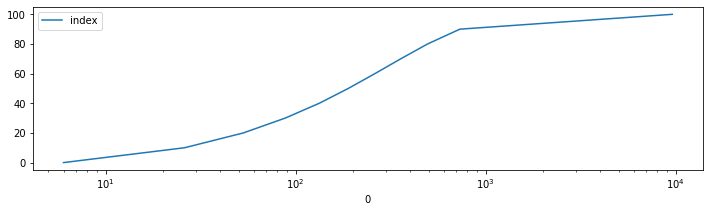

CPU times: user 613 ms, sys: 20.8 ms, total: 634 ms
Wall time: 28 s


In [32]:
%%time
df = df_trx.groupby(dataset.config.col_client_id).count()
df = df.groupby().agg(*[F.percentile_approx('count', pos).alias(f'{pos * 100:.0f}')
                        for pos in np.linspace(0, 1, 11)])
df = df.toPandas()
display(df.assign(col_name='count').set_index('col_name'))

_, ax = plt.subplots(1, 1, figsize=(12, 3))
df.T.reset_index().set_index(0).astype(float).plot(ax=ax)
plt.xscale('log')
plt.show()

In [31]:
dataset.config.col_client_id

'app_id'

,0,10,20,30,40,50,60,70,80,90,100
col_name,,,,,,,,,,,
amnt,0.0,0.24659,0.276496,0.298695,0.320248,0.342564,0.365407,0.390997,0.427627,0.48598,1.0


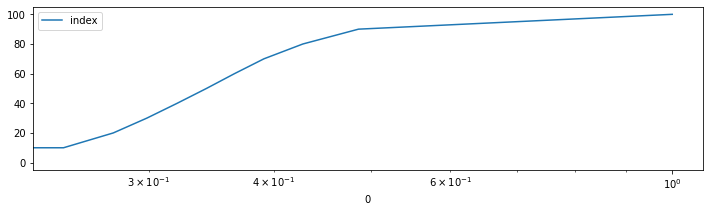

,0,10,20,30,40,50,60,70,80,90,100
col_name,,,,,,,,,,,
hour_diff,-1,0,0,1,2,4,9,17,23,47,8453


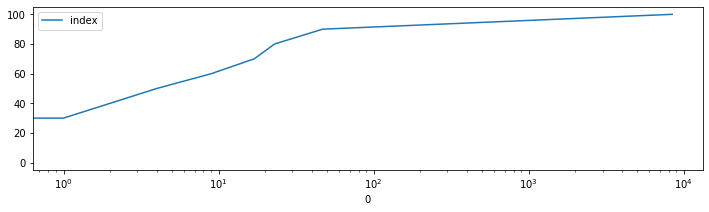

,0,10,20,30,40,50,60,70,80,90,100
col_name,,,,,,,,,,,
days_before,1,29,59,90,122,156,192,230,270,313,359


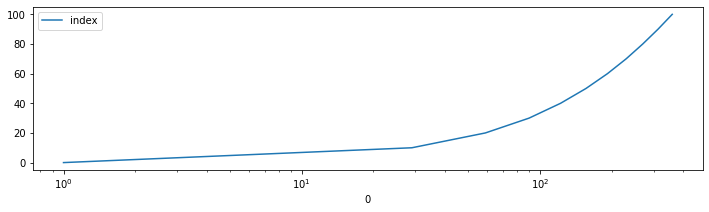

CPU times: user 1.51 s, sys: 110 ms, total: 1.62 s
Wall time: 15min 47s


In [55]:
%%time
for col in dataset.config.cols_log_norm:
    df = df_trx.select(col)
    df = df.groupby().agg(*[F.percentile_approx(col, pos).alias(f'{pos * 100:.0f}')
                            for pos in np.linspace(0, 1, 11)])
    df = df.toPandas()
    display(df.assign(col_name=col).set_index('col_name'))
    
    _, ax = plt.subplots(1, 1, figsize=(12, 3))
    df.T.reset_index().set_index(0).astype(float).plot(ax=ax)
    plt.xscale('log')
    plt.show()

In [67]:
%%time
for col in dataset.config.cols_category:
    df = df_trx.select(col)
    df = df.groupby().agg(
        F.min(F.col(col)).alias(f'min_{col}'),
        F.max(F.col(col)).alias(f'max_{col}'),
    )
    df = df.toPandas()
    display(df.assign(col_name=col).set_index('col_name'))

,min_currency,max_currency
col_name,,
currency,1,11


,min_operation_kind,max_operation_kind
col_name,,
operation_kind,1,7


,min_card_type,max_card_type
col_name,,
card_type,1,175


,min_operation_type,max_operation_type
col_name,,
operation_type,1,22


,min_operation_type_group,max_operation_type_group
col_name,,
operation_type_group,1,4


,min_ecommerce_flag,max_ecommerce_flag
col_name,,
ecommerce_flag,1,3


,min_payment_system,max_payment_system
col_name,,
payment_system,1,7


,min_income_flag,max_income_flag
col_name,,
income_flag,1,3


,min_mcc,max_mcc
col_name,,
mcc,1,108


,min_country,max_country
col_name,,
country,1,24


,min_city,max_city
col_name,,
city,1,163


,min_mcc_category,max_mcc_category
col_name,,
mcc_category,1,28


,min_day_of_week,max_day_of_week
col_name,,
day_of_week,1,7


,min_hour,max_hour
col_name,,
hour,0,23


,min_weekofyear,max_weekofyear
col_name,,
weekofyear,1,53


CPU times: user 242 ms, sys: 22.8 ms, total: 265 ms
Wall time: 19 s


In [69]:
%%time
for col in dataset.config.cols_category:
    df = df_trx.select(col)
    df = df.groupby(col).count()
    df = df.toPandas().rename(columns={'count': f'{col}_cnt'})
    display(df.set_index(col).sort_index())

,currency_cnt
currency,
1,433107418
2,4599153
3,2364953
4,449795
5,299305
6,304594
7,226457
8,182508
9,150968


,operation_kind_cnt
operation_kind,
1,359683765
2,37398044
3,25515781
4,17544316
5,1736900
6,1550550
7,165534


,card_type_cnt
card_type,
1,40121466
2,32209789
3,21373788
4,18364167
5,19104946
...,...
171,183657
172,174736
173,137327


,operation_type_cnt
operation_type,
1,206489436
2,146053875
3,26763671
4,16241606
5,10807568
6,7979125
7,5640827
8,4622066
9,4075312


,operation_type_group_cnt
operation_type_group,
1,413806348
2,29386244
3,402207
4,91


,ecommerce_flag_cnt
ecommerce_flag,
1,390784127
2,52810598
3,165


,payment_system_cnt
payment_system,
1,160346310
2,109193825
3,136776573
4,33933352
5,2320512
6,1024153
7,165


,income_flag_cnt
income_flag,
1,410982016
2,32612392
3,482


,mcc_cnt
mcc,
1,109277403
2,55160056
3,36728851
4,28929835
5,17989108
...,...
104,172913
105,134794
106,158494


,country_cnt
country,
1,422381070
2,3417349
3,3475919
4,2606800
5,1724149
6,870124
7,792000
8,855521
9,706139


,city_cnt
city,
1,130339860
2,62371348
3,27445380
4,13500514
5,12123844
...,...
159,170468
160,148991
161,170153


,mcc_category_cnt
mcc_category,
1,126648319
2,70410733
3,55728457
4,54717959
5,24264574
6,21923848
7,17641306
8,12712917
9,11512829


,day_of_week_cnt
day_of_week,
1,70818709
2,65065549
3,64583619
4,63448403
5,62046622
6,60993784
7,56638204


,hour_cnt
hour,
0,7517465
1,2704511
2,2157123
3,2292902
4,3142795
5,4451328
6,6953410
7,10559802
8,16364410


,weekofyear_cnt
weekofyear,
1,9821406
2,9414701
3,9132231
4,9092347
5,8845353
6,8876800
7,9022072
8,9162707
9,8637661


CPU times: user 214 ms, sys: 53.4 ms, total: 267 ms
Wall time: 24.8 s
